In [1]:
from tensorflow import keras
from keras.layers import Input, Dense, Dropout,Conv2D, AvgPool2D, Flatten,MaxPool2D
from tensorflow.keras.datasets import mnist,cifar10
from matplotlib import pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
cifar=cifar10.load_data()
len(cifar)

2

In [4]:
cifar[0][0].shape

(50000, 32, 32, 3)

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
cifar[0][1].shape

(50000, 1)

In [7]:
cifar[1][0].shape

(10000, 32, 32, 3)

In [8]:
cifar[1][1].shape

(10000, 1)

In [9]:
cifar[1][1][0:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [10]:
cifar[0][0][7].shape

(32, 32, 3)

In [11]:
# plt.imshow(x_train[7],cmap="gray")
# print(y_train[7])

In [12]:
# y_test1=y_test
#Convert the labels into one-hot codes.
# num_classes = 10
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)
# print(y_train[7])

In [13]:
#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255

In [14]:
model=keras.Sequential() #Create a network sequence.
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(filters=20,kernel_size = 5,strides = (1,1), padding = 'valid',activation = 'relu'))
#model.add(Conv2D(filters=6,kernel_size = 5,strides = (1,1), padding = 'same',activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

model.add(Conv2D(filters=30,kernel_size = 5,strides = (1,1), padding = 'valid',activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

# model.add(Conv2D(filters=16,kernel_size = 3,strides = (1,1),padding = 'same',activation = 'relu'))
# model.add(AvgPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))


model.add(Flatten())
model.add(Dense(84,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        1520      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 30)        15030     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 30)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 750)               0         
                                                                 
 dense (Dense)               (None, 84)                6

In [15]:
# model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy']) 
model.compile(optimizer='Adam',loss="sparse_categorical_crossentropy",metrics=['accuracy']) 
results= model.fit(x_train,y_train,epochs=25,batch_size=128,validation_data=(x_test, y_test))



Epoch 1/25
391/391 [==============================] - 14s 10ms/step - loss: 1.6481 - accuracy: 0.4023 - val_loss: 1.4229 - val_accuracy: 0.4883
Epoch 2/25
391/391 [==============================] - 3s 8ms/step - loss: 1.3275 - accuracy: 0.5284 - val_loss: 1.3160 - val_accuracy: 0.5254
Epoch 3/25
391/391 [==============================] - 3s 7ms/step - loss: 1.2008 - accuracy: 0.5780 - val_loss: 1.1642 - val_accuracy: 0.5840
Epoch 4/25
391/391 [==============================] - 3s 6ms/step - loss: 1.1147 - accuracy: 0.6089 - val_loss: 1.1140 - val_accuracy: 0.6048
Epoch 5/25
391/391 [==============================] - 2s 6ms/step - loss: 1.0511 - accuracy: 0.6320 - val_loss: 1.1207 - val_accuracy: 0.6135
Epoch 6/25
391/391 [==============================] - 3s 7ms/step - loss: 0.9914 - accuracy: 0.6539 - val_loss: 1.0309 - val_accuracy: 0.6383
Epoch 7/25
391/391 [==============================] - 3s 8ms/step - loss: 0.9635 - accuracy: 0.6640 - val_loss: 0.9934 - val_accuracy: 0.6577
Epoc

In [16]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 1.0132 - accuracy: 0.6819


[1.0132068395614624, 0.6819000244140625]

In [17]:
y_pred=model.predict(x_test)
y_pred.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [18]:
import numpy as np
from numpy import argmax
y_pred1=argmax(y_pred,axis=1)

[2.0875882e-04 7.5490279e-05 2.0936440e-01 4.9444113e-02 6.7050761e-01
 2.9377002e-02 2.2003707e-02 1.8912317e-02 2.8079903e-05 7.8530720e-05]
4


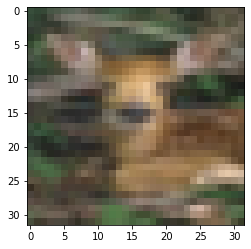

In [19]:
plt.imshow(x_test[503],cmap="gray")
print(y_pred[503])
print(y_pred1[503])

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(y_pred1,y_test))
print(accuracy_score(y_pred1,y_test))

# print(confusion_matrix(y_pred1,y_test1))
# print(accuracy_score(y_pred1,y_test1))


[[726  20  61  27  23  14   6  23  87  29]
 [ 24 790   9  17   4   4   9   6  52  77]
 [ 75  11 585  91  71  90  54  47  25   7]
 [ 17  13  45 468  48 181  65  30  14  14]
 [ 39   8 139 102 712  73  95  66  12  11]
 [  3   2  49 147  25 506  19  47   7   3]
 [ 11  13  49  54  30  26 713   5   8   2]
 [ 14   3  39  45  68  69  10 754   4  13]
 [ 47  13   6  10  12  11   5   2 737  16]
 [ 44 127  18  39   7  26  24  20  54 828]]
0.6819


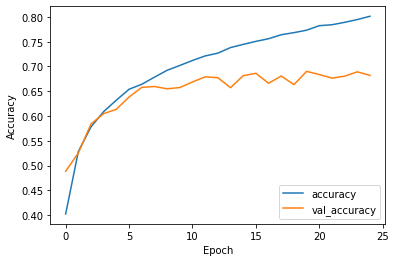

In [21]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')